## APLICACIÓN DEL MODELO K-MEANS EN EL DATASET MALL CUSTOMER SEGMENTATION DATA

In [2]:
# -----------------------------------
# LIBRERIAS
# -----------------------------------

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

# Configuración Gráficas
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]
sns.set_theme( palette= palette, context= "notebook")

In [3]:
# -----------------------------------
# CARGUE DE DATOS
# -----------------------------------

data = pd.read_csv("Mall_Customers.csv")

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [5]:
# -----------------------------------
# INFORMACIÓN DEL DATASET
# -----------------------------------

# Número de filas y columnas:
data.shape
print(f"Dimesiones del DataFrame: {data.shape}")

# Algunos valores del dataset:
data.head(20)

Dimesiones del DataFrame: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
# Principales medidas de tendencia central:

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# -----------------------------------
# TRATAMIENTO DE VALORES FALTANTES
# -----------------------------------

# Valores faltantes en las variables:
data.info()

# Cantidad de valores faltantes por variable:
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# No se identifican valores faltantes

In [9]:
# -----------------------------------
# TRATAMIENTO DE VALORES ATÍPICOS
# -----------------------------------

# Conteo de Datos Atípicos

Total_Atipicos_age = (data['Age']<0).sum()
print("El total de datos atípicos de la columna Age es {}".format(Total_Atipicos_age))

Total_Atipicos_spending = ((data['Spending Score (1-100)']<0)|(data['Spending Score (1-100)']>100)).sum()
print("El total de datos atípicos de la columna Spending Score es {}".format(Total_Atipicos_spending))

El total de datos atípicos de la columna Age es 0
El total de datos atípicos de la columna Spending Score es 0


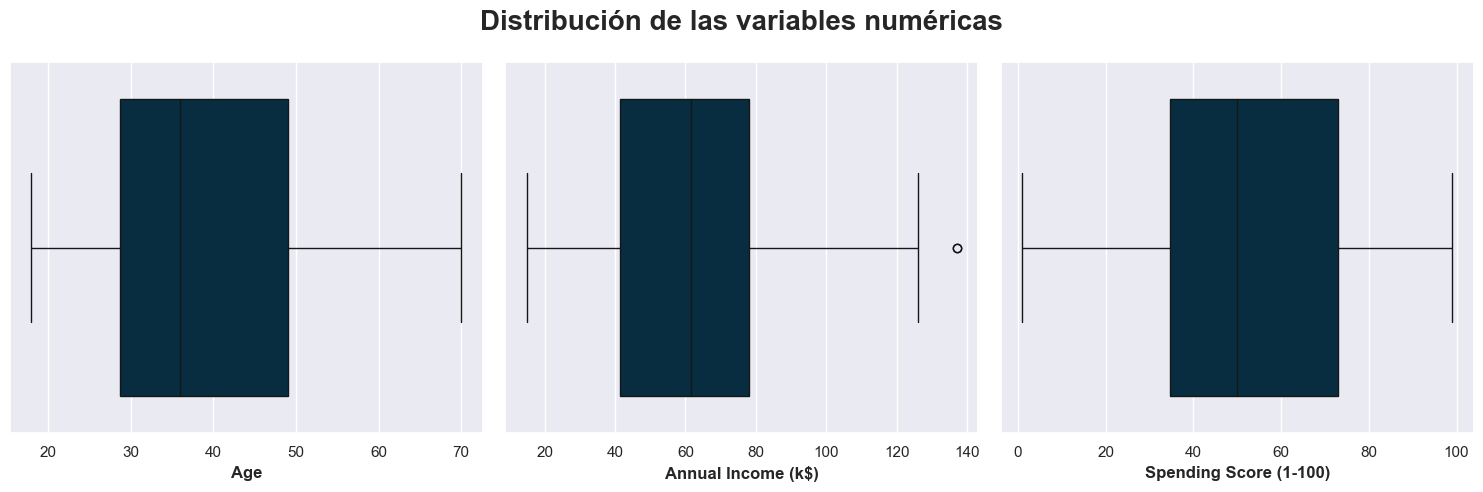

In [10]:
# A continuación vamos a crear las gráficas de caja (box plot) para observar la distribución de las variables numéricas:

caracteristicas = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Creamos cada gráfica de caja de acuerdo a cada una de las variable:
for i in range(3):
    sns.boxplot(data=data, x=caracteristicas[i], ax=axes[i]) # Accedemos directamente al subplot con el índice i
    axes[i].set_xlabel(caracteristicas[i], fontweight="bold")

fig.suptitle("Distribución de las variables numéricas", fontweight= "bold", fontsize= 20)
fig.tight_layout()
plt.show()

In [11]:
# En la variable 'Annual Income (k$)', hay al menos un valor atípico notable alrededor de los 140 k$. Esto sugiere que hay al menos una persona en el conjunto de datos con un ingreso anual significativamente mayor que la mayoría. Como este valor atípico es válido y representa una parte importante de la variabilidad de los datos, se decide mantenerlo ya que eliminarlo podría llevar a una pérdida de información valiosa y sesgar los análisis o modelos. 

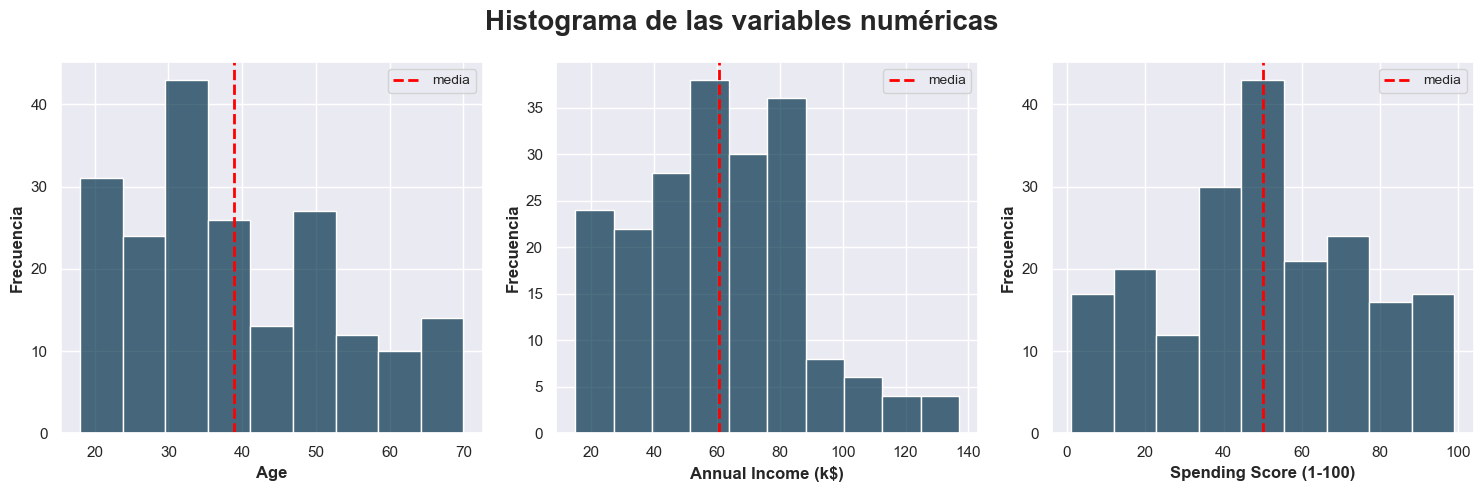

In [12]:
# -----------------------------------
# ANÁLISIS UNIVARIABLE DE VARIABLES NUMÉRICAS
# -----------------------------------

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Creamos cada gráfica de caja de acuerdo a cada una de las variable:
for i in range(3):
    sns.histplot(data=data, x=caracteristicas[i], ax=axes[i], alpha=0.7) # Accedemos directamente al subplot con el índice i
    axes[i].axvline(x=data[caracteristicas[i]].mean(), linewidth=2, color="red", linestyle="dashed", label="media")
    axes[i].set_xlabel(caracteristicas[i], fontweight="bold")
    axes[i].set_ylabel("Frecuencia", fontweight="bold")
    axes[i].legend(fontsize=10)

fig.suptitle("Histograma de las variables numéricas", fontweight= "bold", fontsize= 20)
fig.tight_layout()
plt.show()

## 2. Transformación de variables categóricas

In [14]:
# -----------------------------------
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# -----------------------------------

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'genero'
data['Gender_encoded'] = label_encoder.fit_transform(data['Gender'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Gender_encoded          200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


In [15]:
data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,1
9,10,Female,30,19,72,0


## 3. Selección de las características más relevantes para entrenar el modelo utilizando selección de características

In [17]:
# Características de interes para el agrupamiento:

# Edad
# Annual Income (k$)
# Spending Score (1-100)	

# Filtrar columnas del modelo 

data = data[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
data.head(20)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


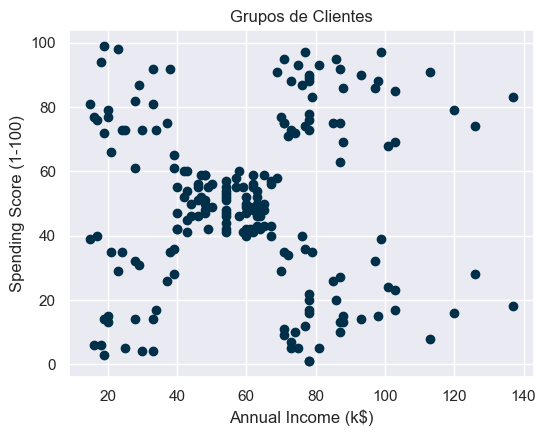

In [18]:
# Grafica antes del agrupamiento

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

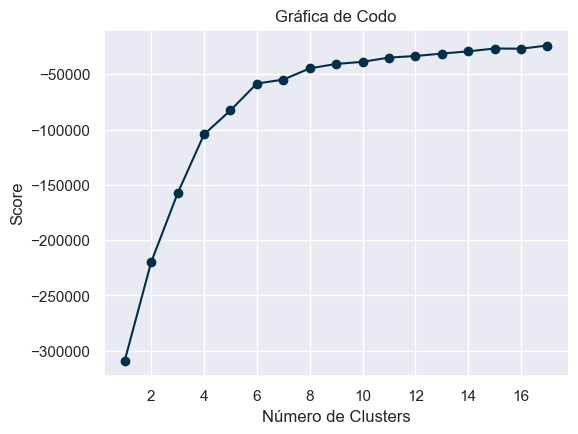

In [20]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 18)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [21]:
# Generación del modelo de Agrupamiento del modelo con K=6 (Es decir haremos 6 grupos de agrupamiento). Se toma este valor considerando que se realizan análisis con valores K iguales a 6, 7, 8, 9 y 10 y, para cada uno, se analizan los valores obtenidos para el Coeficiente Silhouette, el Indice Calinski Harabasz y el Indice Davies Bouldin. Estas 3 métricas se comparan para los diferentes valores de K y se elige el valor K que brinda mejores resultados.  

Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(data)

KMeans(n_clusters=6, random_state=0)

In [22]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
data["Grupo"] = Modelo.labels_ 
print (data)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      5
2     20                  16                       6      2
3     23                  16                      77      5
4     31                  17                      40      2
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [27]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(data)
X = data.drop('Grupo', axis=1)
clusters = data['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.45095124469943243 |
| Indice Calinski Harabasz |  166.5857109469557  |
|  Indice Davies Bouldin   | 0.7515325100425706  |
+--------------------------+---------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo


In [ ]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

In [ ]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

## 7. Interpretar, analizar y documentar los resultados obtenidos

In [ ]:
# Coeficiente Silhouette: La puntuación del Coeficiente Silhouette es de aproximadamente 0.4523. Este valor sugiere que el clustering es moderadamente bueno. Hay cierta separación entre los clústeres, pero podría haber superposición o instancias que no están tan claramente asignadas a un clúster. Generalmente, valores más altos son deseables.
# Índice Calinski-Harabasz: La puntuación de Calinski Harabasz es de aproximadamente 166.71. Este valor sugiere que los clústeres identificados tienen una buena separación y son relativamente densos. Este es un valor positivo, indicando que el algoritmo de clustering logró agrupar los datos de manera significativa. Considerando que este índice es relativo y su interpretación final se realiza comparando los valores obtenidos con diferentes números de clústeres, es importante mencionar que este valor corresponde al valor más alto obtenido al comparar diferentes números de clústeres que iban entre 6 y 10.
# Índice Davies-Bouldin: Esta métrica proporciona un valor de aproximadamente 0.74, lo cual sugiere que hay cierta similitud entre los clústeres, lo que podría indicar que no están perfectamente separados. Idealmente, este índice debería ser lo más cercano a cero posible. Un valor de 0.74 indica que aún podría haber margen de mejora en la separación de los clústeres. Es importante mencionar que, teniendo encuenta que el mejor valor de esta métrica se obtiene comparando diferentes valores obtenidos con diferentes soluciones de clustering, este valor corresponde al valor más bajo obtenido al comparar diferentes números de clústeres que iban entre 6 y 10.